# Problem conversion

Moving from raw problem instance data to MCAPRTIF via pytables.

In [317]:
%load_ext autoreload
%autoreload 2

# Show all code cells outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import logging
logging.basicConfig(level=logging.INFO)

import os
import sys
sys.path.insert(0, os.path.abspath('../../'))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [184]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import numpy as np

In [185]:
from osmnx_network_extract.extract_mcarptif import NetworkExtract
from solver import solve_store_instance

In [187]:
network_file = '../../../hobbes_projects/wasted_large_instances/outputs/city_punggol_full_internal_50m_buffer.h5'
test_network = pd.read_csv('../../../hobbes_projects/wasted_large_instances/outputs/city_punggol_full_internal_50m_buffer_original_dataframe.csv')
test_network = test_network.drop(columns=['Unnamed: 0'])

/Users/ejwillemse/opt/anaconda3/envs/waste_labs_examples/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (14,17,19,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


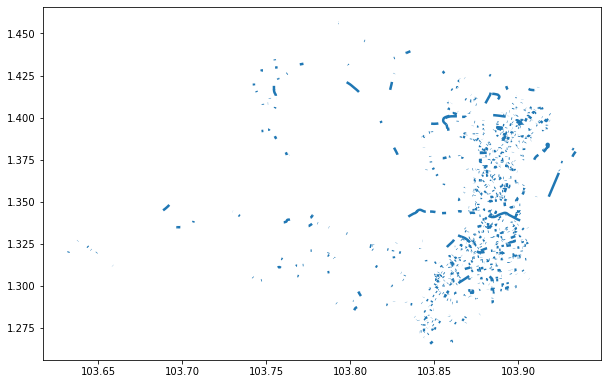

In [6]:
test_size = 1000

sample = np.random.randint(0, test_network.shape[0], size=test_size)
sample = np.unique(sample)
req_arcs = test_network.iloc[sample, :].copy()
req_arcs = req_arcs.sort_values(['arc_index'])
req_arcs = req_arcs.drop_duplicates(['arc_id_ordered'])
req_arcs = req_arcs.dropna(subset=['geometry'])
req_arcs['geometry'] = req_arcs['geometry'].apply(wkt.loads)
req_arcs = gpd.GeoDataFrame(req_arcs, geometry=req_arcs['geometry'], crs='EPSG:4326')

_ = req_arcs.plot(figsize=(10, 10), linewidth=2.5)

In [7]:
test_network.duplicated(['arc_index']).any()

False

## Network testing starts here

In [8]:
network_info = NetworkExtract(test_network, network_file)

depot = req_arcs['arc_index'].iloc[0]
ifs = req_arcs['arc_index'].iloc[-4:]

network_info.load_required_arcs(req_arcs)
network_info.set_depot_arc(depot)
network_info.set_if_arcs(ifs)
network_info.loc_in_required_arcs()
network_info.extend_required_inverse_arcs()
network_info.load_distance_matrix()
network_info.offload_calculations()

INFO:root:Creating inverse arc list
INFO:root:Number of edges: 19170
INFO:root:Edges with inverse pairs: 17799
INFO:root:Number of arcs: 17794
INFO:root:Load required arcs
INFO:root:Set depot
INFO:root:Set offload facilities
INFO:root:Extend required arcs with inverse edge arcs
INFO:root:Load distance matrix: 1435 x 1435
INFO:root:Creating nearest neighbour lists
INFO:root:Calculate offloads: 1435 x 1435 x 4


In [9]:
network_info.set_travel_speed(10000)
network_info.set_offload_time(10000)
network_info.update_cost_matrix()
network_info.update_offload_cost()

INFO:root:Update travel durations.
INFO:root:Update offload durations.


In [10]:
network_info.reqArcList

array([   53, 33045, 33114, ..., 32970, 32986, 33047])

In [11]:
network_info.reqArcListActual

array([   5,    6,    7, ..., 1432, 1433, 1434])

In [12]:
network_info.reqEdgesPure

array([  6,   7,  11,  14,  16,  17,  25,  37,  44,  57,  62,  65,  78,
        81,  83,  87,  94,  97, 108, 113, 116, 129, 131, 133, 140, 167,
       169, 171, 181, 184, 188, 192, 197, 201, 207, 211, 221, 227, 229,
       230, 232, 241, 270, 271, 273, 274, 275, 276, 277, 279, 280, 281,
       282, 283, 284, 285, 286, 290, 291, 293, 294, 297, 298, 299, 300,
       301, 302, 304, 305, 306, 307, 308, 309, 310, 312, 313, 314, 315,
       316, 318, 319, 320, 321, 323, 326, 327, 328, 330, 332, 333, 334,
       335, 336, 338, 339, 342, 343, 345, 346, 347, 349, 351, 352, 353,
       356, 357, 360, 361, 363, 364, 365, 367, 370, 371, 372, 373, 374,
       376, 378, 379, 380, 381, 382, 383, 384, 387, 388, 389, 393, 394,
       396, 398, 399, 401, 402, 403, 404, 407, 408, 409, 410, 411, 412,
       413, 414, 415, 417, 418, 419, 421, 422, 423, 424, 425, 427, 428,
       429, 430, 432, 433, 436, 437, 440, 441, 442, 443, 445, 446, 447,
       449, 450, 452, 453, 454, 455, 456, 458, 460, 462, 463, 46

In [13]:
network_info.reqArcsPure

array([  5,   8,   9,  10,  12,  13,  15,  18,  19,  20,  21,  22,  23,
        24,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  38,
        39,  40,  41,  42,  43,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  58,  59,  60,  61,  63,  64,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  79,  80,  82,  84,
        85,  86,  88,  89,  90,  91,  92,  93,  95,  96,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 109, 110, 111, 112, 114, 115,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130,
       132, 134, 135, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 168, 170, 172, 173, 174, 175,
       176, 177, 178, 179, 180, 182, 183, 185, 186, 187, 189, 190, 191,
       193, 194, 195, 196, 198, 199, 200, 202, 203, 204, 205, 206, 208,
       209, 210, 212, 213, 214, 215, 216, 217, 218, 219, 220, 22

In [14]:
network_info.reqInvArcList

array([None, None, None, ..., 930.0, 931.0, 935.0], dtype=object)

In [15]:
network_info.req_inv_list_full

,arc_index,arc_index_inv,req_arc_index,req_arc_index_inv
0,53,None,0,None
1,33045,None,1,None
2,33114,None,2,None
3,33130,None,3,None
4,33219,None,4,None
...,...,...,...,...
1430,32897,32898,1430,928
1431,33084,32954,1431,929
1432,32970,32972,1432,930
1433,32986,32984,1433,931


In [16]:
network_info.main_arc_list

,arc_index,arc_index_inv,req_arc_index,req_arc_index_inv,arc_category
0,53,-1,0,-1,depot
1,33045,-1,1,-1,offload
2,33114,-1,2,-1,offload
3,33130,-1,3,-1,offload
4,33219,-1,4,-1,offload
...,...,...,...,...,...
1430,32897,32898,1430,928,required_edge_inverse
1431,33084,32954,1431,929,required_edge_inverse
1432,32970,32972,1432,930,required_edge_inverse
1433,32986,32984,1433,931,required_edge_inverse


In [17]:
network_info.d_np_req

array([[0.    , 1.9883, 1.9448, ..., 2.0396, 1.9145, 1.9849],
       [1.9443, 0.    , 0.3767, ..., 0.4838, 0.3995, 0.    ],
       [1.8307, 0.4083, 0.    , ..., 0.829 , 0.0899, 0.4049],
       ...,
       [2.0163, 0.4455, 0.7735, ..., 0.    , 0.7963, 0.4421],
       [1.8403, 0.3976, 0.0797, ..., 0.8183, 0.    , 0.3942],
       [1.9477, 0.    , 0.3801, ..., 0.4872, 0.4029, 0.    ]])

In [18]:
network_info.if_cost_np

array([[10000.    , 10001.9883, 10001.9448, ..., 10002.0396, 10001.9145,
        10001.9849],
       [10001.9443, 10000.    , 10000.3767, ..., 10000.4838, 10000.3995,
        10000.    ],
       [10001.8307, 10000.4083, 10000.    , ..., 10000.829 , 10000.0899,
        10000.4049],
       ...,
       [10002.3046, 10000.4455, 10000.7735, ..., 10000.9293, 10000.845 ,
        10000.4455],
       [10001.8911, 10000.3976, 10000.0797, ..., 10000.8691, 10000.0934,
        10000.3976],
       [10001.9443, 10000.    , 10000.3767, ..., 10000.4838, 10000.3995,
        10000.    ]])

In [19]:
network_info.if_arc_np

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [2, 1, 2, ..., 2, 2, 2],
       ...,
       [4, 1, 2, ..., 1, 1, 1],
       [3, 1, 2, ..., 3, 3, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [20]:
service_speed = 1 / 3.6 # (m/s)
service_costs = req_arcs[['arc_index', 'length']].copy()
service_costs['service_cost'] = service_costs[['length']] / service_speed

In [21]:
network_info.set_service_cost(service_costs)

INFO:root:Setting service cost for network


In [22]:
network_info.df_service_cost

,arc_index,arc_index_inv,req_arc_index,req_arc_index_inv,arc_category,length,service_cost,service_cost_inv
0,53,-1,0,-1,depot,9.118,0.0000,NaN
1,33045,-1,1,-1,offload,34.664,0.0000,NaN
2,33114,-1,2,-1,offload,23.354,0.0000,NaN
3,33130,-1,3,-1,offload,20.988,0.0000,NaN
4,33219,-1,4,-1,offload,78.691,0.0000,NaN
...,...,...,...,...,...,...,...,...
1430,32897,32898,1430,928,required_edge_inverse,NaN,896.5872,896.5872
1431,33084,32954,1431,929,required_edge_inverse,NaN,321.1200,321.1200
1432,32970,32972,1432,930,required_edge_inverse,NaN,746.4888,746.4888
1433,32986,32984,1433,931,required_edge_inverse,NaN,1693.7208,1693.7208


In [23]:
demand = 1 # unit
df_demand = req_arcs[['arc_index']].copy()
df_demand['demand'] = 1

network_info.set_service_demand(df_demand)

network_info.set_travel_speed(30 / 3.6)
network_info.set_offload_time(15 * 60)
network_info.update_cost_matrix()
network_info.update_offload_cost()

network_info.d_np_req.mean()
network_info.if_cost_np.mean()

network_info.check_shapes()

network_info.round_key_inputs()

network_info.calc_min_duration_capacity()

INFO:root:Setting demand for network
INFO:root:Update travel durations.
INFO:root:Update offload durations.


1117.4210294843929

2593.100365545288

INFO:root:Round key inputs


In [24]:
service_speed = 1 #1 / 3.6 # (m/s)
service_costs = req_arcs[['arc_index', 'length']].copy()
service_costs['service_cost'] = service_costs[['length']] * 0/ service_speed

network_info.set_travel_speed(60 / 3.6)
network_info.set_offload_time(0)
network_info.update_cost_matrix()
network_info.update_offload_cost()
network_info.set_service_cost(service_costs)

INFO:root:Update travel durations.
INFO:root:Update offload durations.
INFO:root:Setting service cost for network


In [25]:
network_info.calc_min_duration_capacity()
network_info.min_duration
network_info.min_capacity

5379.0599999999995

1

In [26]:
6101.28 / 3600

1.6947999999999999

## Offload calculation test

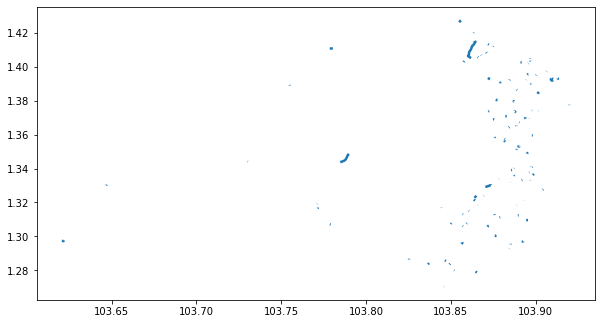

In [27]:
test_size = 100

sample = np.random.randint(0, test_network.shape[0], size=test_size)
sample = np.unique(sample)
req_arcs = test_network.iloc[sample, :].copy()
req_arcs = req_arcs.sort_values(['arc_index'])
req_arcs = req_arcs.drop_duplicates(['arc_id_ordered'])
req_arcs = req_arcs.dropna(subset=['geometry'])
req_arcs['geometry'] = req_arcs['geometry'].apply(wkt.loads)
req_arcs = gpd.GeoDataFrame(req_arcs, geometry=req_arcs['geometry'], crs='EPSG:4326')

_ = req_arcs.plot(figsize=(10, 10), linewidth=2.5)

In [297]:
%%time
network_info = NetworkExtract(test_network, network_file, round_cost=False)

depot = req_arcs['arc_index'].iloc[0]
ifs = req_arcs['arc_index'].iloc[-4:]

network_info.load_required_arcs(req_arcs)
network_info.set_depot_arc(depot)
network_info.set_if_arcs(ifs)
network_info.loc_in_required_arcs()
network_info.extend_required_inverse_arcs()
network_info.load_distance_matrix()

network_info.offload_calculations()
if2_cost_comp = network_info.if_cost_np.copy()
if2_arc_comp = network_info.if_arc_np.copy()

network_info.offload_calculations3D()
if_cost_comp = network_info.if_cost_np.copy()
if_arc_comp = network_info.if_arc_np.copy()

INFO:root:Creating inverse arc list
INFO:root:Number of edges: 19139
INFO:root:Edges with inverse pairs: 17768
INFO:root:Number of arcs: 17825
INFO:root:Load required arcs
INFO:root:Set depot
INFO:root:Set offload facilities
INFO:root:Extend required arcs with inverse edge arcs
INFO:root:Load distance matrix: 1413 x 1413
INFO:root:Creating nearest neighbour lists
INFO:root:Calculate offloads: 1413 x 1413 x 4
INFO:root:Calculate offloads: 1413 x 1413 x 4


CPU times: user 33.3 s, sys: 389 ms, total: 33.7 s
Wall time: 33.8 s


In [300]:
np.array_equiv(if2_arc_comp[1:,:], if2_arc_comp[1:,:],)

True

In [299]:
if_cost_comp
if2_cost_comp

array([[    0, 19023, 20497, ..., 23126, 22617, 25058],
       [18058,     0,  4566, ...,  7164,  9814, 11178],
       [19319,  4891,     0, ...,  4119,  8769,  8028],
       ...,
       [23696,  7857,  4377, ...,  6740, 11844,  8893],
       [27241,  9919,  8371, ..., 10983,  7847,  3136],
       [26594, 11942,  8524, ..., 10336,  7200,  2489]], dtype=int32)

array([[    0., 19023., 20497., ..., 23126., 22617., 25058.],
       [18058.,     0.,  4566., ...,  7164.,  9814., 11178.],
       [19319.,  4891.,     0., ...,  4119.,  8769.,  8028.],
       ...,
       [23696.,  7857.,  4377., ...,  6740., 11844.,  8893.],
       [27241.,  9919.,  8371., ..., 10983.,  7847.,  3136.],
       [26594., 11942.,  8524., ..., 10336.,  7200.,  2489.]])

In [31]:
d = network_info.d_np_req
arc_to_if = d[:, 1]
if_to_arc = d[1, :]

dist1, dist2 = np.meshgrid(arc_to_if, if_to_arc)

dist = dist1 + dist2
dist = dist.T

n_arcs = d.shape[0]
if_cost_np = np.full(d.shape, np.infty)

for i in range(n_arcs):
    for j in range(n_arcs):
        if_cost_np[i,j] = d[i, 1] +  d[1, j] 
        
np.array_equal(if_cost_np, dist)


True

In [32]:
d = network_info.d_np_req

In [33]:
arc_to_if = d[:, 1]
if_to_arc = d[1, :]

dist_x, dist_y = np.meshgrid(arc_to_if, if_to_arc)
dist = dist_x + dist_y
dist1 = dist.T

arc_to_if = d[:, 5]
if_to_arc = d[5, :]

dist_x, dist_y = np.meshgrid(arc_to_if, if_to_arc)
dist = dist_x + dist_y
dist2 = dist.T

arc_to_if = d[:, 10]
if_to_arc = d[10, :]

dist_x, dist_y = np.meshgrid(arc_to_if, if_to_arc)
dist = dist_x + dist_y
dist3 = dist.T

In [34]:
if_arc_array = np.dstack([dist1, dist2, dist3])
if_arc_array.min(axis=2)
if_arc_array.argmin(axis=2)

array([[    0, 31795, 34084, ..., 31733, 34025, 31698],
       [31149,     0,  3404, ...,     0,  3345,   695],
       [33479,  4891,  8295, ...,  4891,  8236,  5586],
       ...,
       [31149,     0,  3404, ...,     0,  3345,   695],
       [33538,  4950,  8354, ...,  4950,  8295,  5645],
       [31541,  1604,  5008, ...,  1604,  4949,  2299]], dtype=int32)

array([[1, 0, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

## Large instance calculation test

(1802, 28)

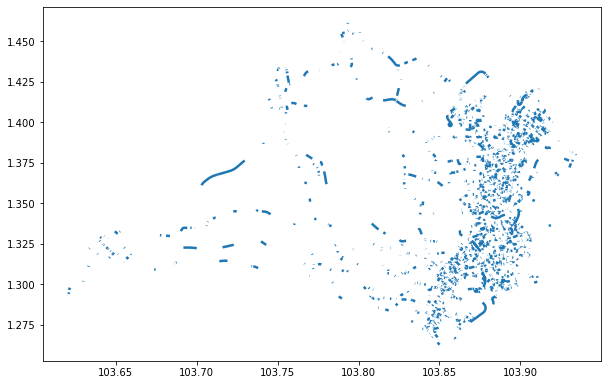

In [456]:
test_size = 2000

sample = np.random.randint(0, test_network.shape[0], size=test_size)
sample = np.unique(sample)
req_arcs = test_network.iloc[sample, :].copy()
req_arcs = req_arcs.sort_values(['arc_index'])
req_arcs = req_arcs.drop_duplicates(['arc_id_ordered'])
req_arcs = req_arcs.dropna(subset=['geometry'])
req_arcs['geometry'] = req_arcs['geometry'].apply(wkt.loads)
req_arcs = gpd.GeoDataFrame(req_arcs, geometry=req_arcs['geometry'], crs='EPSG:4326')

req_arcs.shape

_ = req_arcs.plot(figsize=(10, 10), linewidth=2.5)

In [457]:
%%time
network_info = NetworkExtract(test_network, network_file, round_cost=True)

depot = req_arcs['arc_index'].iloc[0]
ifs = req_arcs['arc_index'].iloc[-4:]

network_info.load_required_arcs(req_arcs)
network_info.set_depot_arc(depot)
network_info.set_if_arcs(ifs)
network_info.loc_in_required_arcs()
network_info.extend_required_inverse_arcs()
network_info.check_main_list()

INFO:root:Creating inverse arc list
INFO:root:Number of edges: 19139
INFO:root:Edges with inverse pairs: 17768
INFO:root:Number of arcs: 17825
INFO:root:Load required arcs
INFO:root:Set depot
INFO:root:Set offload facilities
INFO:root:Extend required arcs with inverse edge arcs
INFO:root:Checking master list


CPU times: user 154 ms, sys: 25.9 ms, total: 180 ms
Wall time: 176 ms


In [458]:
network_info.load_distance_matrix()

INFO:root:Load distance matrix: 2698 x 2698
INFO:root:Creating nearest neighbour lists


In [459]:
network_info.offload_calculations3D()

INFO:root:Calculate offloads: 2698 x 2698 x 4


In [460]:
demand = 1 # unit
df_demand = req_arcs[['arc_index']].copy()
df_demand['demand'] = 1
network_info.set_service_demand(df_demand)

service_speed = 1 / 3.6
service_costs = req_arcs[['arc_index', 'length']].copy()
service_costs['service_cost'] = service_costs['length'] / service_speed
network_info.set_service_cost(service_costs)

network_info.check_shapes()

INFO:root:Setting demand for network
INFO:root:Setting service cost for network


In [469]:
network_info.set_travel_speed(60 / 3.6)
network_info.set_offload_time(15 * 60)

network_info.update_cost_matrix()
network_info.update_offload_cost()

network_info.set_vechile_capacity_constraint(100)
network_info.set_vehicle_duration_constraint(10 * 60 * 60)

INFO:root:Update travel durations.
INFO:root:Update offload durations.


In [470]:
#network_info.calc_min_duration_capacity()
network_info.min_duration
network_info.min_capacity
network_info.capacity

12879.396799999999

1.0

100

In [474]:
solution_df = solve_store_instance('', improve = 'LS', write_results=False, info=network_info, overwrite=True, test_solution=True, full_output=False, tollerance=60)

Problem info supplied. Directly proceeding to solve problem.

Z: 725107 	 Savings: -1 	 Relocate arc 5 (R 0, T 0, P 1) before arc 30 (R 0, T 0, P 45) 	 relocate 	 Feasible moves
Z: 725059 	 Savings: -48 	 Relocate arc 6 (R 0, T 0, P 51) before arc 391 (R 10, T 0, P 43) 	 relocatePreArcIF 	 Feasible moves
Z: 725058 	 Savings: -1 	 Relocate arc 17 (R 6, T 0, P 6) before arc 1811 (R 6, T 0, P 49) 	 relocate 	 Feasible moves
Z: 725045 	 Savings: -13 	 Relocate arc 49 (R 6, T 0, P 12) before arc 41 (R 6, T 0, P 36) 	 relocate 	 Feasible moves
Z: 724996 	 Savings: -49 	 Relocate arc 50 (R 6, T 0, P 42) before arc 1823 (R 6, T 0, P 41) 	 relocate 	 Feasible moves
Z: 724990 	 Savings: -6 	 Relocate arc 63 (R 6, T 0, P 53) before arc 187 (R 14, T 0, P 66) 	 relocate 	 Feasible moves
Z: 724954 	 Savings: -36 	 Relocate arc 67 (R 9, T 0, P 84) before arc 1724 (R 9, T 0, P 97) 	 relocate 	 Feasible moves
Z: 724877 	 Savings: -77 	 Relocate arc 70 (R 14, T 0, P 28) before arc 238 (R 14, T 0, P 63) 

In [481]:
solution_df.groupby(['route', 'activity_type']).agg(total_time = ('activity_time', 'sum'))

total_time
route activity_type            
0     arrive_if          0.0000
      collect        28160.9712
      depart_if          0.0000
      depot_end          0.0000
      depot_start        0.0000
...                         ...
19    arrive_if          0.0000
      collect        26251.8840
      depot_end          0.0000
      depot_start        0.0000
      offload          900.0000

[106 rows x 1 columns]

In [477]:
route_summary = solution_df.groupby('route').agg(n_offloads = ('subroute', 'nunique'),
                                                 demand_collected = ('activity_demand', 'sum'),
                                                 activity_time = ('activity_time', 'sum'),
                                                 travel_time = ('total_traversal_time_to_activity', 'sum'),
                                                 total_time = ('cum_time', 'max')).reset_index()

route_summary['route'] = route_summary['route'] + 1
n_routes = route_summary['route'].max()
route_summary['activity_time'] =(route_summary['activity_time'] / 3600)
route_summary['total_time'] = (route_summary['total_time'] / 3600)
route_summary['travel_time'] = (route_summary['travel_time'] / 3600)
route_summary = route_summary.append(route_summary.sum(numeric_only=True), ignore_index=True)
route_summary.iloc[-1, 0] = n_routes
route_summary = route_summary.reset_index()
route_summary['index'] = ' '
route_summary.iloc[-1, 0] = 'Total'
route_summary = route_summary.round(2)
route_summary = route_summary.rename(columns={'index': ''})
route_summary
#route_summary.style.apply(df_style, axis=1)

,,route,n_offloads,demand_collected,activity_time,travel_time,total_time
0,,1.0,2.0,119.0,8.32,1.64,9.96
1,,2.0,1.0,65.0,8.68,1.32,10.00
2,,3.0,1.0,48.0,8.39,1.61,10.00
3,,4.0,2.0,101.0,8.34,1.42,9.76
4,,5.0,1.0,82.0,8.16,1.83,9.99
5,,6.0,2.0,106.0,8.44,1.55,9.99
6,,7.0,2.0,123.0,8.37,1.62,9.99
7,,8.0,1.0,44.0,7.68,2.31,9.99
8,,9.0,2.0,106.0,8.59,1.39,9.98
9,,10.0,1.0,98.0,8.43,1.57,9.99


In [479]:
substrip_summary = solution_df.groupby(['route', 'subroute']).agg(demand_collected = ('activity_demand', 'sum'),
                                                                  activity_time = ('activity_time', 'sum'),
                                                                  travel_time = ('total_traversal_time_to_activity', 'sum')).reset_index()

substrip_summary['route'] = substrip_summary['route'] + 1
substrip_summary['subroute'] = substrip_summary['subroute'] + 1
substrip_summary['activity_time'] = (substrip_summary['activity_time'] / 3600)
substrip_summary['travel_time'] = (substrip_summary['travel_time'] / 3600)
substrip_summary['total_time'] = substrip_summary['travel_time'] + substrip_summary['activity_time']
substrip_summary = substrip_summary.round(2)
substrip_summary

,route,subroute,demand_collected,activity_time,travel_time,total_time
0,1,1,97.0,6.53,0.97,7.49
1,1,2,22.0,1.80,0.67,2.47
2,2,1,65.0,8.68,1.32,10.00
3,3,1,48.0,8.39,1.61,10.00
4,4,1,100.0,8.00,0.98,8.98
5,4,2,1.0,0.34,0.44,0.78
6,5,1,82.0,8.16,1.83,9.99
7,6,1,89.0,7.23,0.91,8.14
8,6,2,17.0,1.21,0.64,1.85
9,7,1,97.0,5.82,1.01,6.83
